# Load the dataset

In [1]:
import pandas as pd
import numpy as np
Dataset = pd.read_csv(r'C:\Users\user\Documents\BritishAirwaysNew.csv', encoding = 'latin1')

# Text Extraction and Preprocessing

In [4]:
import re # Regular Expression
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt_tab')

# Preprocess Text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
Dataset['clean_text'] = Dataset['body'].astype(str).apply(preprocess_text)
Dataset['clean_text']

0       worst experience life trying deal customer ser...
1       due code sharing cathay pacific downgraded ba ...
2       lhr check quick first wing quickly security fi...
3       wouldnt recommend british airways tried call c...
4       absolutely horrible experience booked ticket e...
                              ...                        
3523    lhrjfklaxlhr check ok apart snapped early chec...
3524    lhr ham purser addresses club passengers name ...
3525    son worked british airways urged fly british a...
3526    london citynew york jfk via shannon really nic...
3527    sinlhr ba b first class old aircraft seats pri...
Name: clean_text, Length: 3528, dtype: object

# Feature Engineering

In [5]:
# Vectorize The Text
from sklearn.feature_extraction.text import TfidfVectorizer
Convert_text = TfidfVectorizer(max_features=5000)
X = Convert_text.fit_transform(Dataset['clean_text'])

In [6]:
# Create another column by Classifying Sentiments through overall_rating
Dataset['overall_rating'] = pd.to_numeric(Dataset['overall_rating'], errors='coerce')
Dataset.dropna(subset=['overall_rating'], inplace=True)
Dataset['sentiment'] = Dataset['overall_rating'].apply(lambda x: 1 if x > 3 else 0)

In [7]:
print(X.shape, Dataset['sentiment'].shape)

(3528, 5000) (3524,)


In [8]:
#print(X.isnull().sum(), Dataset['sentiment'].isnull().sum())
#X_dense  = pd.DataFrame(X.toarray())
#print(X_dense.isnull().sum().sum(),
 #     Dataset['sentiment'].isnull().sum())

In [12]:
# Convert X back to dense format and match the index
#X_dense  = pd.DataFrame(X.toarray(), index = Dataset.index)
X = X[:len(Dataset['sentiment'])]
print(X.shape, Dataset['sentiment'].shape)


(3524, 5000) (3524,)


# Model Building and Evaluation

In [13]:
#Split the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Dataset['sentiment'], test_size=0.2, random_state=42)

In [15]:
#Train a model and make a prediction for Sentiment Classification using LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print("Sentiment Classification Report:\n", classification_report(y_test, y_hat))


Sentiment Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       314
           1       0.81      0.83      0.82       391

    accuracy                           0.80       705
   macro avg       0.80      0.80      0.80       705
weighted avg       0.80      0.80      0.80       705



In [16]:
# Predicting Satisfaction Score using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Satisfaction Score Prediction Accuracy:", accuracy_score(y_test, y_pred))

Satisfaction Score Prediction Accuracy: 0.7843971631205674


In [17]:
# Customer Clustering
from sklearn.cluster import KMeans
Cus_Clus = KMeans(n_clusters=3, random_state=42)
Cus_Clus.fit(X.toarray())
Dataset['cluster'] = Cus_Clus.labels_

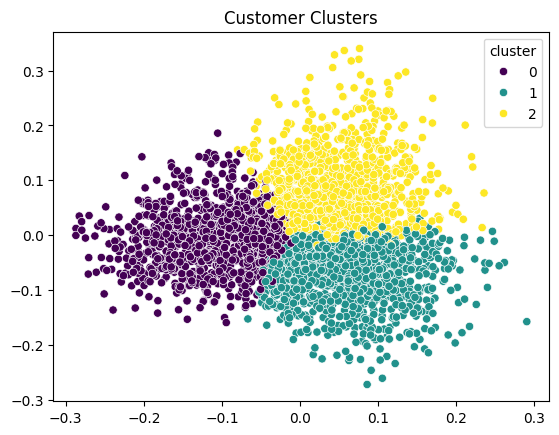

In [18]:
#Visualize Clusters
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=Dataset['cluster'], palette='viridis')
plt.title("Customer Clusters")
plt.show()